# QUESTIONS

1. Consider the  Table Contains the Average Annual Gold Rate from 1965 – 2022. Gold prices fluctuated throughout the year 2020 because of the COVID-19 epidemic. With gold functioning as a safe haven for investors, demand for the precious metal grew, and its price followed suit. During the epidemic, the stock market weakened, but it began to recover by the end of 2020 when the price of gold fell slightly.\
It’s crucial to remember that gold prices fluctuate during the year, and the figure below represents the average price for that year.\
With the exception of a few lows shared across a few years, The table shows that the gold price trend has always been upward, supporting the claim that gold is a secure investment over extended periods of time.
Write a python program to find the fitted simple linear regression equation for the given data. 
Compare the coefficients obtained from sklearn model with your program. Compute the error, MSE and RMSE. Predict the gold price with the year 2025 for 1 gram.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:
gold = pd.read_csv("gold.csv")
gold.head(10)

,Year,Price
0,2022,52950
1,2021,50045
2,2020,48651
3,2019,35220
4,2018,31438
5,2017,29667
6,2016,28623
7,2015,26343
8,2014,28006
9,2013,29600


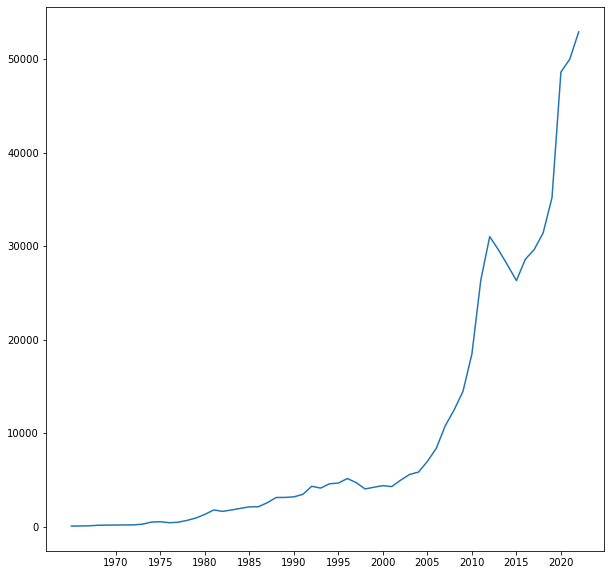

In [28]:
x = gold.Year
y = gold.Price
fig = plt.figure(figsize = (10,10))
plt.xticks([i for i in range(1970,2025,5)])
plt.plot(x,y)

In [66]:
def LinearRegression(x,y):
    n = len(x)
    xsum = x.sum()
    ysum = y.sum()
    npx = np.array(x)
    npy = np.array(y)
    xy = npx*npy
    xysum = xy.sum()
    xsquare = npx**2
    xsquaresum = xsquare.sum()
    b = (n*xysum - xsum*ysum)/((n*xsquaresum) - (xsum)**2)
    # a = (ysum - b*xsum)/n
    a = (ysum*xsquaresum - xsum*xysum)/((n*xsquaresum) - (xsum)**2)
    return (a,b)

In [67]:
a,b = LinearRegression(x,y)
print("Equation: y = ",a,"+",b,"x")

Equation: y =  -1336226.704266511 + 675.343658679135 x


In [102]:
model = LinearRegression()
npx = np.array(x)
npy = np.array(y)
npx = npx.reshape(-1, 1)
npy = npy.reshape(-1, 1)
model.fit(npx,npy)
print(model.score(npx,npy))
a = model.intercept_
b = model.coef_
known = 2025
predict = a + b*known
print(predict)
print(a,b)

0.6710948804187664
[[31344.20455874]]
[-1336226.70426651] [[675.34365868]]


In [99]:
predicted_vals = a+b*npx
residual = np.array(predicted_vals).reshape(-1,1) - npy
MSE = (residual**2).sum()/len(npx)
print(MSE)
RMSE = MSE**(1/2)
print(RMSE)

62644360.72375514
7914.81905818163


In [101]:
print("For year 2025, Gold prices for 1 gram will be: ",(a+b*2025)/10)

For year 2025, Gold prices for 1 gram will be:  [[3134.42045587]]


In [118]:
print("For year 2025, Gold prices for 1 gram will be: ",(a+b*2024)/10)

For year 2025, Gold prices for 1 gram will be:  [[3066.88609001]]


2. 
Consider the Question no 1 gold price with following year-wise silver price. Write a python program to find the fitted multiple linear regression equation for the given data.  Compare the coefficients obtained from sklearn model with your program. Compute the error, MSE and RMSE. Predict the gold and silver price with the year 2024 for 1 gram.

In [112]:
def MultipleRegression(x1,x2,y):
    npx1 = np.array(x1)
    npx2 = np.array(x2)
    npy = np.array(y)
    x1sum = x1.sum()
    x2sum = x2.sum()
    ysum = y.sum()
    x1square = npx1**2
    x1squaresum = x1square.sum()
    x2square = npx2**2
    x2squaresum = x2square.sum()
    x1x2 = npx1*npx2
    x1y = npx1*npy
    x2y = npx2*npy
    x1x2sum = x1x2.sum()
    x1ysum = x1y.sum()
    x2ysum = x2y.sum()
    b1 = ((x2squaresum*x1ysum) - (x1x2sum*x2ysum))/((x1squaresum*x2squaresum) - (x1x2sum)**2)
    b2 = ((x1squaresum*x2ysum) - (x1x2sum*x1ysum))/((x1squaresum*x2squaresum) - (x1x2sum)**2)
    b0 = ysum - b1*x1sum - b2*x2sum
    return (b0,b1,b2)

In [113]:
gs = pd.read_csv("gold_silver.csv")
gs.head()

,Year,Gold,Silver
0,2022,52950,55100
1,2021,50045,62572
2,2020,48651,63435
3,2019,35220,40600
4,2018,31438,41400


### Case 1: Predict Silver Price

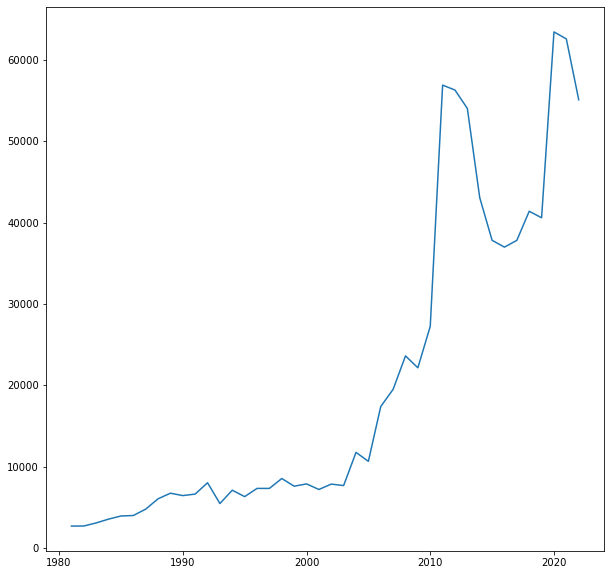

In [114]:
x1 = gs.Year
x2 = gs.Gold
y = gs.Silver
fig = plt.figure(figsize = (10,10))
plt.plot(x1,y)

In [115]:
b0,b1,b2 = MultipleRegression(x1,x2,y)
print(b0,b1,b2)
print("Equation: y = ",b0,"+",b1,"*x1",b2,"*x2")

/tmp/ipykernel_3767/492306195.py:18: RuntimeWarning: overflow encountered in long_scalars
  b1 = ((x2squaresum*x1ysum) - (x1x2sum*x2ysum))/((x1squaresum*x2squaresum) - (x1x2sum)**2)


In [119]:
year = 2024
gold = 30668.8609001
predict = b0 + b1*year + b2*gold
print("Silver price per gram in 2024 = ",predict/1000)

Silver price per gram in 2024 =  41.88052539680597


In [124]:
npx1 = np.array(x1)
npx2 = np.array(x2)
npy = np.array(y)
predicted_vals = b0 + b1*npx1 + b2*npx2
residual = np.array(predicted_vals).reshape(-1,1) - npy
MSE = (residual**2).sum()/len(npx)
print(MSE)
RMSE = MSE**(1/2)
print(RMSE)

21193548544.448414
145580.0417105601


### Case 2: Predict Gold Price

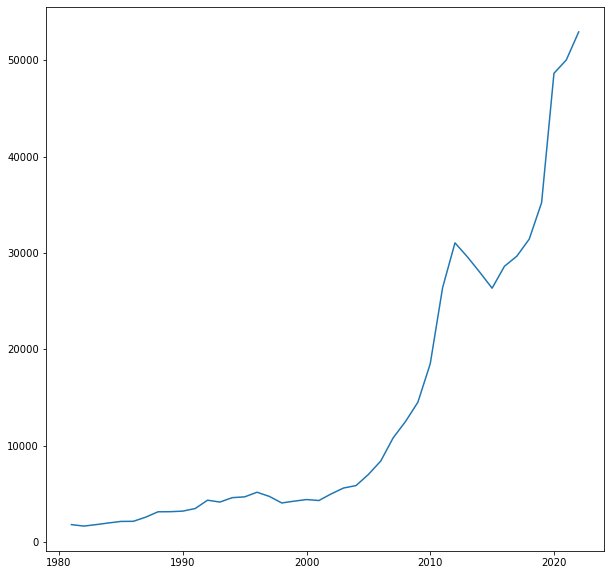

In [125]:
x1 = gs.Year
x2 = gs.Silver
y = gs.Gold
fig = plt.figure(figsize = (10,10))
plt.plot(x1,y)

In [126]:
b0,b1,b2 = MultipleRegression(x1,x2,y)
print(b0,b1,b2)
print("Equation: y = ",b0,"+",b1,"*x1",b2,"*x2")

-141.1289228828391 -0.4942313991613354 0.7221120343093753
Equation: y =  -141.1289228828391 + -0.4942313991613354 *x1 0.7221120343093753 *x2


/tmp/ipykernel_3767/492306195.py:18: RuntimeWarning: overflow encountered in long_scalars
  b1 = ((x2squaresum*x1ysum) - (x1x2sum*x2ysum))/((x1squaresum*x2squaresum) - (x1x2sum)**2)


In [127]:
year = 2024
silver = 41880.52539680597
predict = b0 + b1*year + b2*silver
print("Gold price per gram in 2024 = ",predict/10)

Gold price per gram in 2024 =  2910.097811744764


In [128]:
npx1 = np.array(x1)
npx2 = np.array(x2)
npy = np.array(y)
predicted_vals = b0 + b1*npx1 + b2*npx2
residual = np.array(predicted_vals).reshape(-1,1) - npy
MSE = (residual**2).sum()/len(npx)
print(MSE)
RMSE = MSE**(1/2)
print(RMSE)

12492727204.215147
111770.86921114619
